In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

import torch
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


In [152]:
from torchvision.models import resnet50
model = resnet50(pretrained=True).eval().to(device)

In [153]:
#from torchcam.methods import SmoothGradCAMpp
from torchcam.methods import GradCAM, CAM
#cam_extractor = GradCAM(model)
#cam_extractor = SmoothGradCAMpp(model)
cam_extractor = CAM(model)
# CAM GradCAM GradCAMpp ISCAM LayerCAM SSCAM ScoreCAM SmoothGradCAMpp XGradCAM

In [154]:
from torchvision import transforms
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [155]:
img_path = 'images/airplane.jpg'

In [156]:
img_pil = Image.open(img_path)
input_tensor = test_transform(img_pil).unsqueeze(0).to(device)

In [157]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [158]:
pred_logits = model(input_tensor)
pred_top1 = torch.topk(pred_logits, 1)
pred_id = pred_top1[1].detach().cpu().numpy().squeeze().item()

In [159]:
pred_id

404

In [160]:
activation_map = cam_extractor(pred_id, pred_logits)

In [161]:
activation_map = activation_map[0][0].detach().cpu().numpy()

In [162]:
activation_map.shape

(7, 7)

In [163]:
activation_map

array([[0.        , 0.00913187, 0.02523293, 0.02977202, 0.02666234,
        0.02042455, 0.02058692],
       [0.01363702, 0.01574421, 0.03188146, 0.03778072, 0.03777857,
        0.03402616, 0.0401268 ],
       [0.01815118, 0.02858747, 0.03852518, 0.03169315, 0.03183459,
        0.03294965, 0.04037294],
       [0.01351976, 0.0486933 , 0.08980417, 0.10248806, 0.04740258,
        0.03174245, 0.03355975],
       [0.06086393, 0.27806517, 0.5268044 , 0.57674265, 0.62197703,
        0.4723248 , 0.3069571 ],
       [0.11347109, 0.42979908, 0.7711591 , 0.92155474, 0.9811564 ,
        0.81718594, 0.53686595],
       [0.16394004, 0.46305373, 0.7162695 , 0.87512857, 1.        ,
        0.847443  , 0.5600424 ]], dtype=float32)

In [164]:
print(activation_map)

[[0.         0.00913187 0.02523293 0.02977202 0.02666234 0.02042455
  0.02058692]
 [0.01363702 0.01574421 0.03188146 0.03778072 0.03777857 0.03402616
  0.0401268 ]
 [0.01815118 0.02858747 0.03852518 0.03169315 0.03183459 0.03294965
  0.04037294]
 [0.01351976 0.0486933  0.08980417 0.10248806 0.04740258 0.03174245
  0.03355975]
 [0.06086393 0.27806517 0.5268044  0.57674265 0.62197703 0.4723248
  0.3069571 ]
 [0.11347109 0.42979908 0.7711591  0.92155474 0.9811564  0.81718594
  0.53686595]
 [0.16394004 0.46305373 0.7162695  0.87512857 1.         0.847443
  0.5600424 ]]


## 可视化

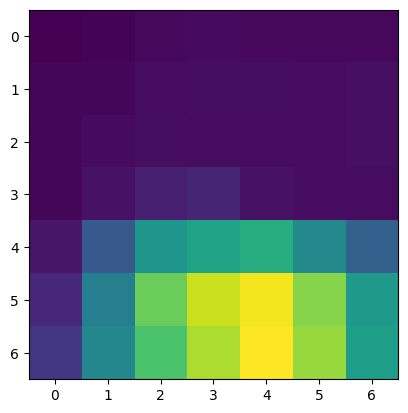

In [165]:
plt.imshow(activation_map)
plt.show()

In [166]:
from torchcam.utils import overlay_mask

result = overlay_mask(img_pil, Image.fromarray(activation_map), alpha=0.7)

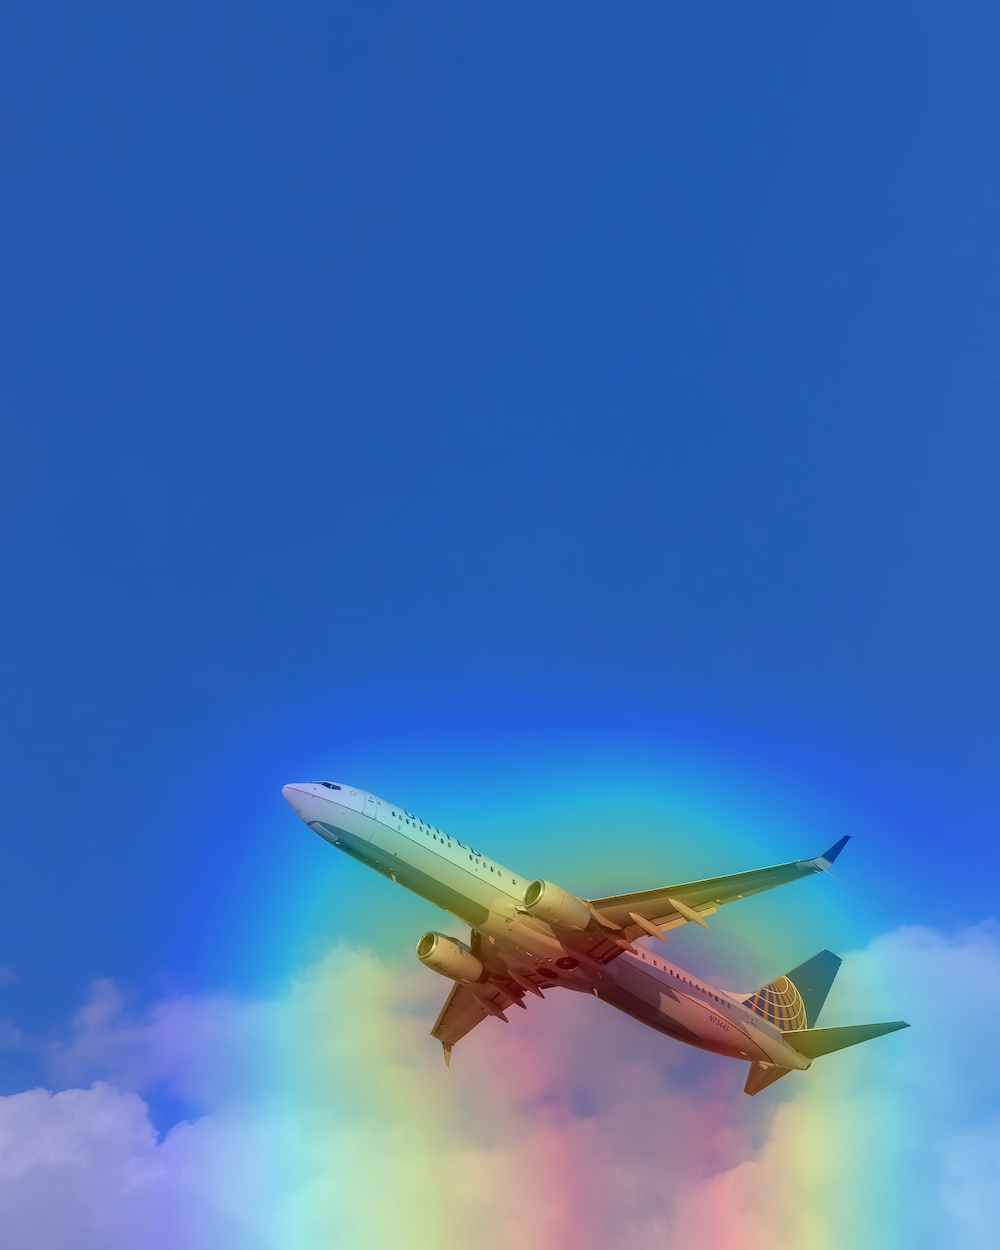

In [167]:
result

In [168]:
print(activation_map)

[[0.         0.00913187 0.02523293 0.02977202 0.02666234 0.02042455
  0.02058692]
 [0.01363702 0.01574421 0.03188146 0.03778072 0.03777857 0.03402616
  0.0401268 ]
 [0.01815118 0.02858747 0.03852518 0.03169315 0.03183459 0.03294965
  0.04037294]
 [0.01351976 0.0486933  0.08980417 0.10248806 0.04740258 0.03174245
  0.03355975]
 [0.06086393 0.27806517 0.5268044  0.57674265 0.62197703 0.4723248
  0.3069571 ]
 [0.11347109 0.42979908 0.7711591  0.92155474 0.9811564  0.81718594
  0.53686595]
 [0.16394004 0.46305373 0.7162695  0.87512857 1.         0.847443
  0.5600424 ]]


In [169]:
npmap7 = np.asarray(activation_map)

In [170]:
map7224 = np.repeat(npmap7, 32,axis=1)

In [171]:
print(map7224.shape)

(7, 224)


In [172]:
map224224 = np.repeat(map7224, 32,axis=0)

In [173]:
print(map224224.shape)

(224, 224)


In [174]:
print(map224224)

[[0.         0.         0.         ... 0.02058692 0.02058692 0.02058692]
 [0.         0.         0.         ... 0.02058692 0.02058692 0.02058692]
 [0.         0.         0.         ... 0.02058692 0.02058692 0.02058692]
 ...
 [0.16394004 0.16394004 0.16394004 ... 0.5600424  0.5600424  0.5600424 ]
 [0.16394004 0.16394004 0.16394004 ... 0.5600424  0.5600424  0.5600424 ]
 [0.16394004 0.16394004 0.16394004 ... 0.5600424  0.5600424  0.5600424 ]]


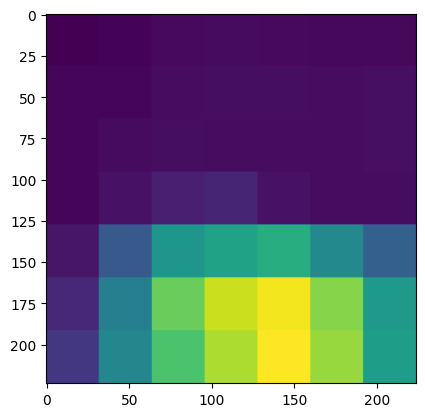

In [175]:
plt.imshow(map224224)